## `YOLO model introduction and implementation`
###### - [Yolo Link](https://pjreddie.com/darknet/yolo/)

In [1]:
import cv2
import numpy as np
import argparse
import matplotlib.pyplot as plt

#### `building the CLI`

In [2]:
ap = argparse.ArgumentParser()
ap.add_argument('-i','--image',required=True,help='path of the the image')
ap.add_argument('-c','--config',required=True,help='path of the config file')
ap.add_argument('-w','--weight',required=True,help='path of the weight')
ap.add_argument('-c1','--classes',required=True,help='path of the class file')

_StoreAction(option_strings=['-c1', '--classes'], dest='classes', nargs=None, const=None, default=None, type=None, choices=None, help='path of the class file', metavar=None)

In [3]:
def get_output_layers(net):
    layers_names = net.getLayerNames()
    output_layers = [layers_names[i - 1] for i in net.getUnconnectedOutLayers()]
    return output_layers   

In [4]:
def draw_prediction(img,class_id,confidence,x,y,x_plus_w,y_plus_h):
    label = str(classes[class_id])
    color = COLORS[class_id]
    cv2.rectangle(img,(x,y),(x_plus_w,y_plus_h),color,thickness=3)
    cv2.putText(img,label,(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,4)
# 0.5 size of the text
# 4 thickness of the text

In [5]:
img = cv2.imread('F:/Yolo/traffic.jpg')

(480, 720, 3)


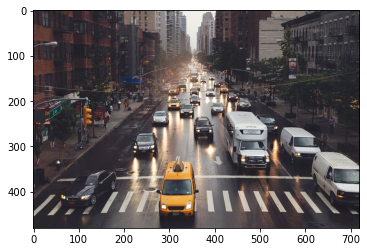

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(img.shape)

In [7]:
width = img.shape[1]
height = img.shape[0]
scale = 0.00392
classes = None

In [8]:
with open(r'F:/Yolo/yolo.txt','r') as f:
    classes = [line.strip() for line in f.readlines()]
COLORS = np.random.uniform(0,255,size=(len(classes),3))

net = cv2.dnn.readNet(r'F:/Yolo/yolov3.weights',r'F:/Yolo/yolov3.cfg')
blob = cv2.dnn.blobFromImage(img,scale,(416,416),(0,0,0),True,crop=False)
net.setInput(blob)
outs = net.forward(get_output_layers(net))
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.5

#### CUDA problem with cv2 occoured, cured
### model is ready

In [9]:
print(outs)

(array([[0.03333934, 0.04437773, 0.39811546, ..., 0.        , 0.        ,
        0.        ],
       [0.04325251, 0.03185666, 0.29605532, ..., 0.        , 0.        ,
        0.        ],
       [0.04913734, 0.03717722, 0.78319097, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9583089 , 0.95395374, 0.47993356, ..., 0.        , 0.        ,
        0.        ],
       [0.96432966, 0.9620593 , 0.33637843, ..., 0.        , 0.        ,
        0.        ],
       [0.96289337, 0.9634015 , 0.9001612 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01968786, 0.02286511, 0.0422193 , ..., 0.        , 0.        ,
        0.        ],
       [0.01789738, 0.01964728, 0.34936726, ..., 0.        , 0.        ,
        0.        ],
       [0.02178846, 0.01528192, 0.06542635, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.97171885, 0.9750895 , 0.05026738, ..., 0.        , 0.        ,
        0.        ],
       [0.9789422 

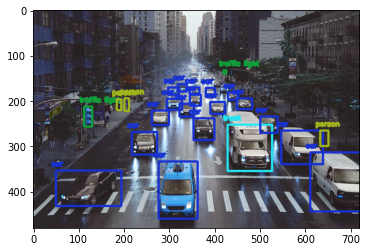

In [10]:
for out in outs:
    for detection in out:
        scores = detection[5:] # initial 5 values are just description
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x,y,w,h])
            
indices = cv2.dnn.NMSBoxes(boxes,confidences,conf_threshold,nms_threshold)
for i in indices:
    #i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(img,class_ids[i],confidences[i],round(x),round(y),round(x+w),round(y+h))

cv2.imshow('Vehicle Detection',img)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Cuda problem resolved from sir code

## `Google's model ( Objectron ): tells 3D aspect of image`

In [11]:
import cv2 as cv2
import mediapipe as mp
import matplotlib.pyplot as plt

In [12]:
drawing = mp.solutions.drawing_utils
object_detector = mp.solutions.objectron

Object detected


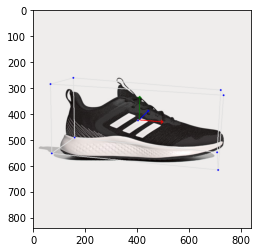

In [13]:
img = [r'F:\Yolo\shoes.jpg']
with object_detector.Objectron(static_image_mode=True,max_num_objects=1,min_detection_confidence=0.4,model_name='Shoe') as objectron:
    for idx,file in enumerate(img):
        image = cv2.imread(file)
        results = objectron.process(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        if not results.detected_objects:
            print('No object detected')
            continue
        print('Object detected')
        annotated_image = image.copy()
        for object_detect in results.detected_objects:
            drawing.draw_landmarks(
            annotated_image,object_detect.landmarks_2d,object_detector.BOX_CONNECTIONS)
            drawing.draw_axis(annotated_image,object_detect.rotation,object_detect.translation)
            plt.imshow(annotated_image)
            cv2.imshow('object detected',annotated_image)
            cv2.waitKey(0)
            plt.show()

## `END -----------------------------------------`